In [3]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""A very simple MNIST classifier.
See extensive documentation at
http://tensorflow.org/tutorials/mnist/beginners/index.md
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse

# Import data
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None

In [4]:
#training using softmax cross entropy
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

  # Create the model
x = tf.placeholder(tf.float32, [None, 784])
#W = tf.Variable(tf.random_normal([784, 10], stddev=0.2))
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b
#y = tf.nn.softmax(y) no activation function

  # Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
#cross entropy sem softmax

sess = tf.InteractiveSession()

tf.initialize_all_variables().run()
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

#print (sess.run(W))
    

IOError: [Errno socket error] [Errno 8] nodename nor servname provided, or not known

In [733]:
#print (mnist.train.shape())

print (sess.run(tf.argmax(W,0)))

#print (sess.run(W))
#print (sess.run(b))


# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Training accuracy: ", sess.run(accuracy, feed_dict={x:mnist.train.images, y_: mnist.train.labels}))

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Test accuracy: ",sess.run(accuracy, feed_dict={x: mnist.test.images,
                                                      y_: mnist.test.labels}))



[683]


ValueError: Cannot feed value of shape (55000, 10) for Tensor u'Placeholder_183:0', which has shape '(?, 1)'

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
[ 7.77836837  6.40220988  6.88500209 ...,  6.10343777  6.59480633
  6.50617222]


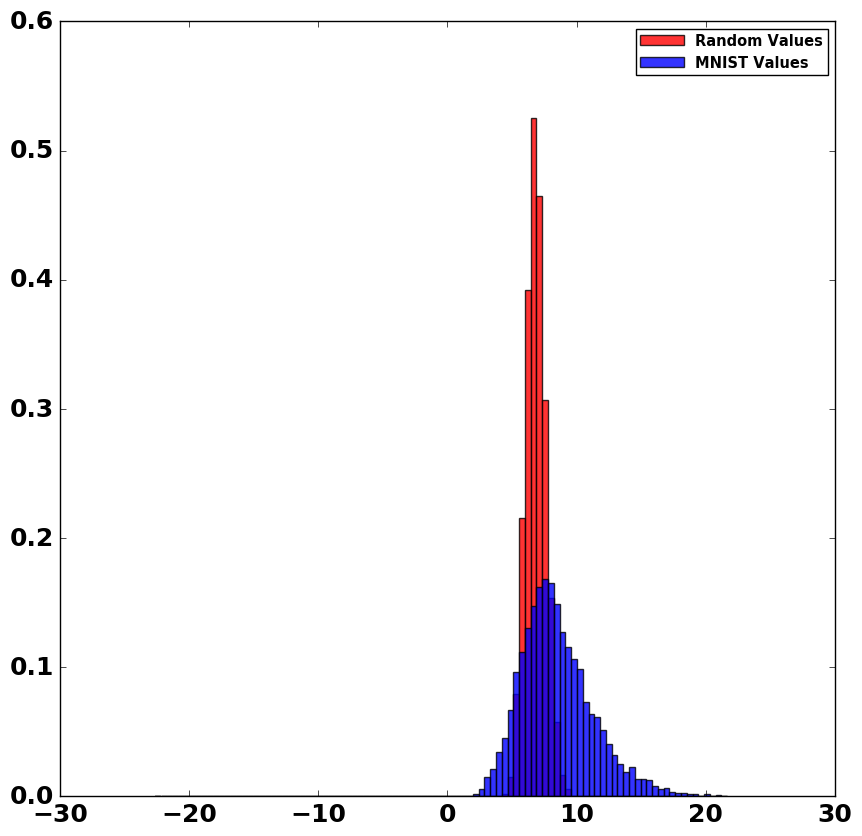

In [424]:
import numpy as np

targets = mnist.test.labels[0:10000]
inputs = mnist.test.images[0:10000]

weights = np.array(sess.run(W))
biases = np.array(sess.run(b))

outputs = np.dot(inputs,weights)+biases

print (outputs.argmax(1))
print (targets.argmax(1))


input_test = np.random.random([10000,784])
outputs_test = np.dot(input_test,weights)+biases


import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

print (outputs_test.max(1))
n_bins = np.linspace(min([outputs_test.max(1).min(), outputs.min()]),
                     max([outputs_test.max(1).max(), outputs.max()]),
                     100)


fig, ax = plt.subplots(figsize=(10,10),nrows=1, ncols=1)
n, bins, patches = ax.hist(outputs_test.max(1),bins=n_bins,fc='r',alpha=0.8, normed=1,label='Random Values')

n, bins, patches = ax.hist(outputs.max(1),bins=n_bins,fc='b',alpha=0.8, normed=1,label='MNIST Values')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels,loc='upper right', fontsize=10.5)


In [ ]:
#encontrar uma topologia de rede que diferencie numeros de coisas aleatorias
#fazer uma celula que plota os eventos do mnist.
# fazer uma figura 28x28 e preencher com um valor do mnist e comparar com uma figura random 
# e ver como a rede classifica

#uma opção
#usar uma função de ativação 
#duas classes: mnist 1 e não mnist 0
#conjunto de treino: tudo mnist com label 1 

#segunda opção
#usar uma função de ativação 
#duas classes: mnist 1 e aleatório -1
#conjunto de treino: mnist com label 1 e aleatório com -1


In [487]:
#only one class, with labels 1
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

  # Create the model
x = tf.placeholder(tf.float32, [None, 784])
#W = tf.Variable(tf.random_normal([784, 10], stddev=0.2))
W = tf.Variable(tf.zeros([784, 1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x, W) + b
#y = tf.nn.softmax(y) no activation function

  # Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 1])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()

tf.initialize_all_variables().run()
for _ in range(1000):
    batch_xs = mnist.train.images[0:10000]
    #batch_ys = mnist.train.labels[0:100]
    batch_ys = np.ones((10000, 1))
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [488]:
#print(mnist.test.images.shape)
#print(mnist.train.labels)
#batch_ys1 = np.ones((5000, 10))

#print(batch_ys1)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
test_labels = np.ones((10000, 2))
print("Test accuracy: ",sess.run(accuracy, feed_dict={x: mnist.test.images,
                                      y_: test_labels}))

Test accuracy:  1.0


[[  6700.45263672   6700.45263672]
 [  8315.609375     8315.609375  ]
 [  4405.31103516   4405.31103516]
 ..., 
 [ 11902.84472656  11902.84472656]
 [  9549.94921875   9549.94921875]
 [ 13323.66992188  13323.66992188]]
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]
[ 14126.65060532  12840.65102607  13631.264353   ...,  13910.41991146
  13624.65962328  13433.34660384]


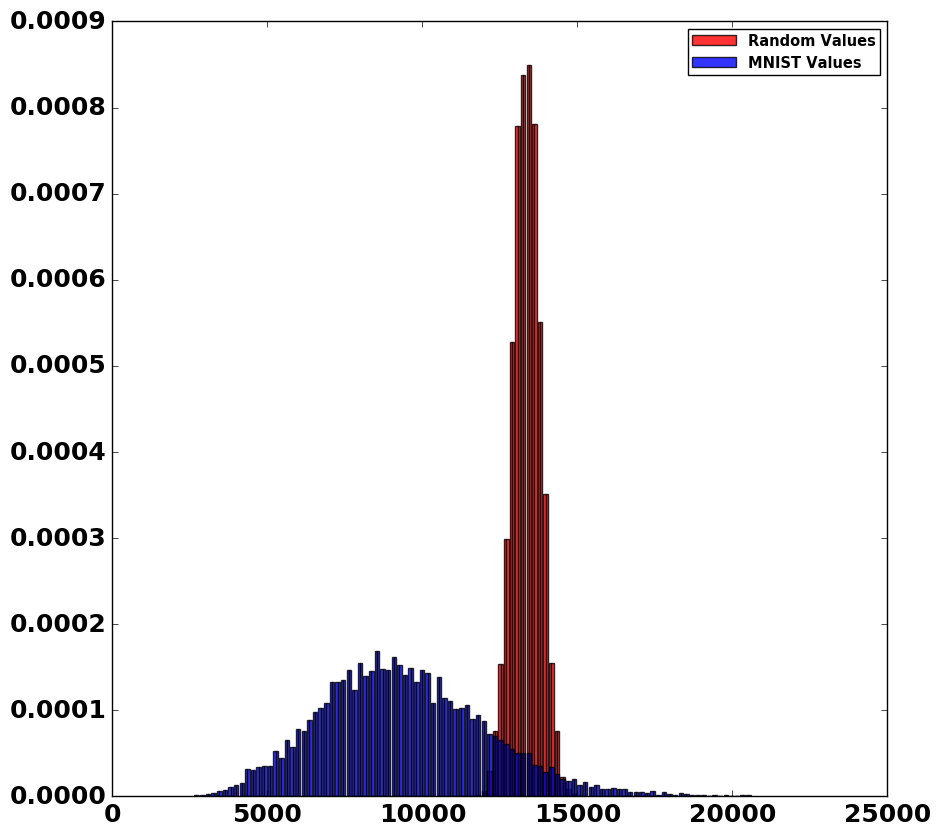

In [489]:
import numpy as np

#targets = mnist.test.labels[0:10000]
targets = np.ones((10000,10))
inputs = mnist.test.images

weights = np.array(sess.run(W))
biases = np.array(sess.run(b))

outputs = np.dot(inputs,weights)+biases

print (outputs)
print (targets)

input_test = np.random.random([10000,784])
outputs_test = np.dot(input_test,weights)+biases
#labels_random = 

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

print (outputs_test.max(1))
n_bins = np.linspace(min([outputs_test.min(), outputs.min()]),
                     max([outputs_test.max(), outputs.max()]),
                     100)


fig, ax = plt.subplots(figsize=(10,10),nrows=1, ncols=1)
n, bins, patches = ax.hist(outputs_test,bins=n_bins,fc='r',alpha=0.8, normed=1,label='Random Values')

n, bins, patches = ax.hist(outputs,bins=n_bins,fc='b',alpha=0.8, normed=1,label='MNIST Values')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels,loc='upper right', fontsize=10.5)

In [496]:
print (weights[200])

[ 2.16412497  2.16412497]


In [11]:
#two classes, random -1 and mnist 1, with activation function
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)
rand_train = np.random.random([20000,784])
input_train = numpy.concatenate((mnist.train.images[0:20000], rand_train), axis=0)
  # Create the model
x = tf.placeholder(tf.float32, [None, 784])
#W = tf.Variable(tf.random_normal([784, 1], stddev=0.2))
W = tf.Variable(tf.zeros([784, 1]))
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(x, W) + b
y_activ = tf.nn.sigmoid(y)

  # Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 1])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_activ, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()

tf.initialize_all_variables().run()
for _ in range(1000):
    batch_xs = input_train
    #batch_ys = mnist.train.labels[0:100]
    batch_ys = np.concatenate((np.ones((20000, 1)),np.dot(np.ones((20000,1)),-1)))
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

IOError: [Errno socket error] [Errno 8] nodename nor servname provided, or not known

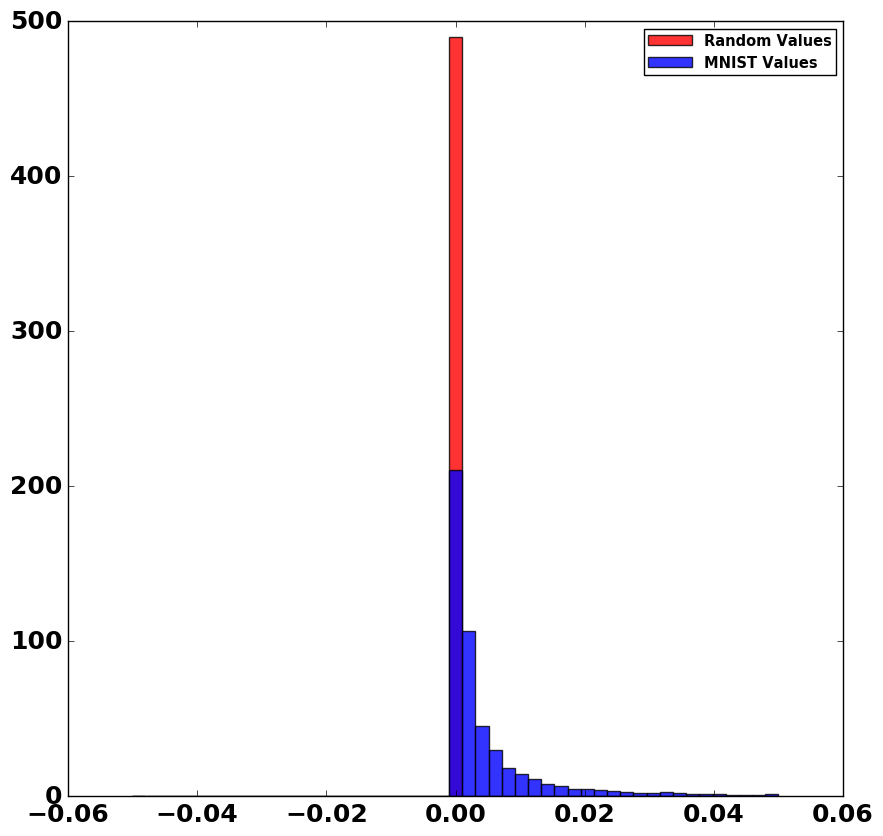

In [730]:
import numpy as np
inputs = mnist.test.images
weights = np.array(sess.run(W))
biases = np.array(sess.run(b))

outputs = np.dot(inputs,weights)+biases
out_mnist_activ = tf.nn.sigmoid(outputs)
out_mnist = np.array(sess.run(out_mnist_activ))

input_test = np.random.random([10000,784])
outputs_test = np.dot(input_test,weights)+biases
out_rndm_activ = tf.nn.sigmoid(outputs_test)
out_rndm = np.array(sess.run(out_rndm_activ))

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

#print (outputs_test.max(1))
#n_bins = np.linspace(min([out_rndm.min(), out_mnist.min()]),
#                     max([out_rndm.max(), out_mnist.max()]),
#                     100)
n_bins = np.linspace(-0.05,0.05)

fig, ax = plt.subplots(figsize=(10,10),nrows=1, ncols=1)
n, bins, patches = ax.hist(out_rndm,bins=n_bins,fc='r',alpha=0.8, normed=1,label='Random Values')

n, bins, patches = ax.hist(out_mnist,bins=n_bins,fc='b',alpha=0.8, normed=1,label='MNIST Values')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels,loc='upper right', fontsize=10.5)

In [639]:
print(input_test.shape)
print(weights.shape)
print(biases.shape)

#print (np.inner(input_test,weights.T))

(10000, 784)
(784, 1)
(1,)


NameError: name 'mnist' is not defined

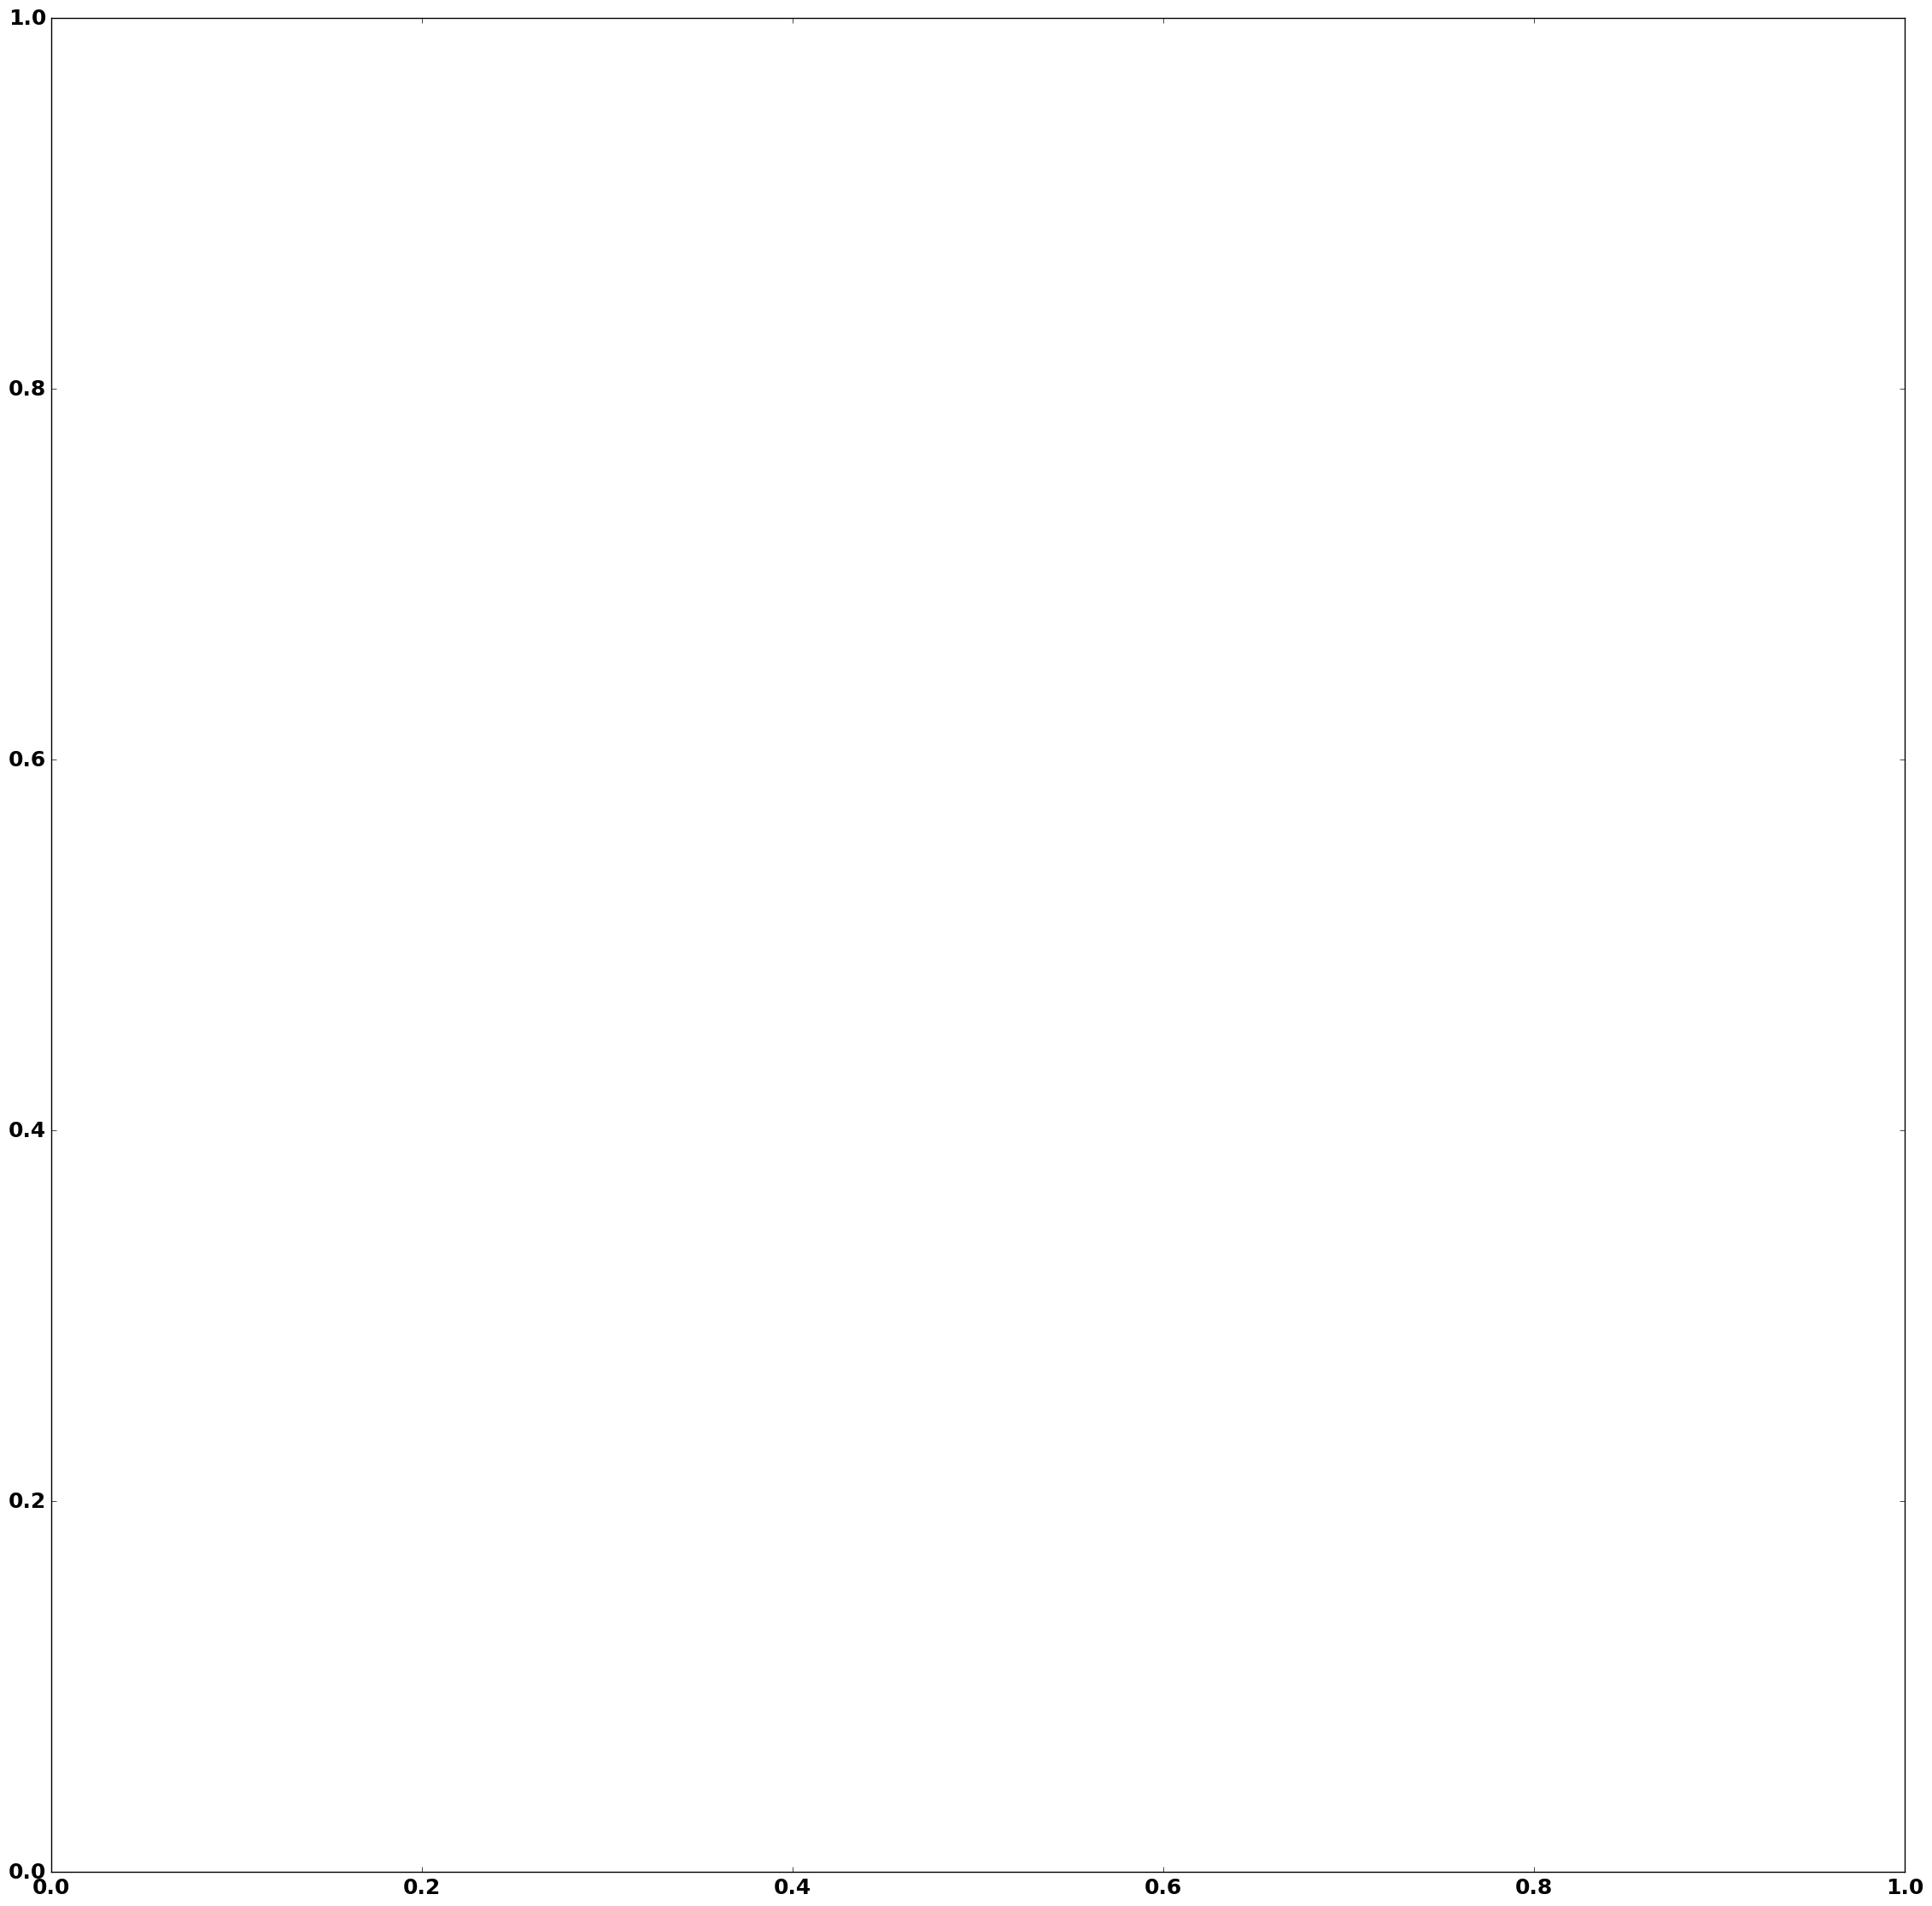

In [1]:
import cv2
import numpy as np
img = cv2.imread('mais.jpg',cv2.CV_LOAD_IMAGE_GRAYSCALE)
#print (img)
img[img>128] = 255
img[img<128] = 0
img_inv = abs(img - 255)
#img_norm = img_inv/255

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

fig, ax = plt.subplots(figsize=(28,28),nrows=1, ncols=1)
mnist_test = np.reshape(mnist.test.images[3,:],[28,28])
ax.imshow(mnist_test,cmap='gray',interpolation="nearest")

print(img_inv.shape)
print(mnist_test.shape)

In [724]:
true_input = np.reshape(img_inv,[1,784])
#print (true_input)

out_mais = np.dot(true_input,weights)+biases
out_sig= tf.nn.sigmoid(out_mais)

rand_inp = np.random.random([1,784])
out_rand = np.dot(rand_inp,weights)+biases
out_rand_act = tf.nn.sigmoid(out_rand)

#print (rand_inp)
print ("saída para o mais:", sess.run(out_sig))
print ("saída para o aleatório:", sess.run(out_rand_act))

saída para o mais: [[ 0.01243385]]
saída para o aleatório: [[  4.64606403e-11]]
